In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

ImportError: cannot import name 'line_search_wolfe1' from 'sklearn.utils.fixes' (d:\FACULTAD\5to\Ciencia de datos\TP2\jeroenv\Lib\site-packages\sklearn\utils\fixes.py)

In [ ]:
df = pd.read_csv('tweets_hate_speech.csv')
df.head()

,tweet,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive


In [ ]:
df.describe()

,tweet,label
count,24783,24783
unique,24783,3
top,!!! RT @mayasolovely: As a woman you shouldn't...,offensive
freq,1,19190


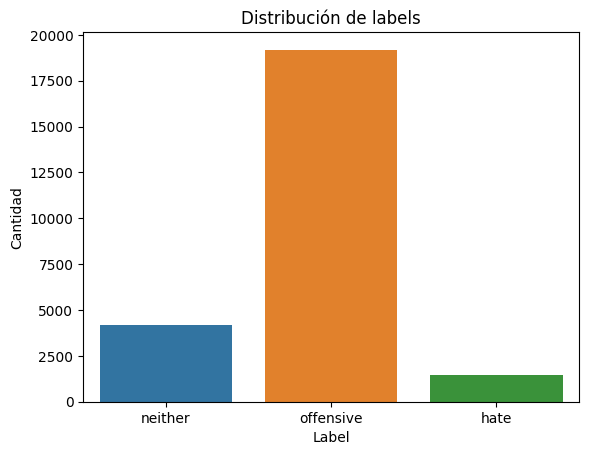

In [ ]:
# Distribución por sentimiento
sns.countplot(data=df, x='label',
              hue='label', legend=False)
plt.title("Distribución de labels")
plt.xlabel("Label")
plt.ylabel("Cantidad")
plt.show()

In [ ]:
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 3]
    return " ".join(tokens)

df['clean_text'] = df['tweet'].apply(clean_text)

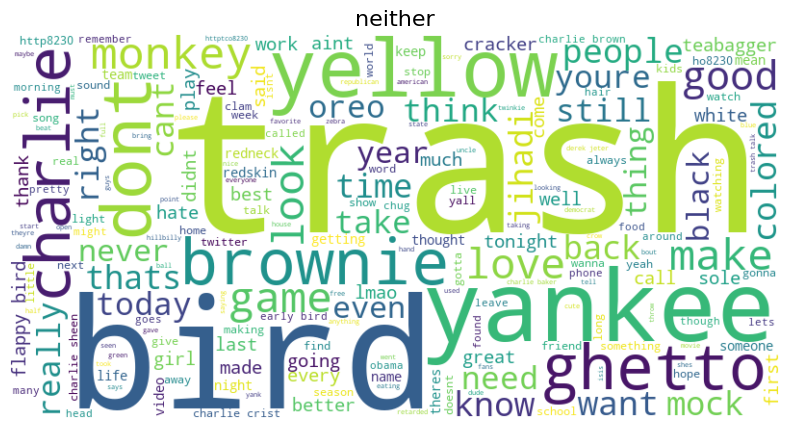

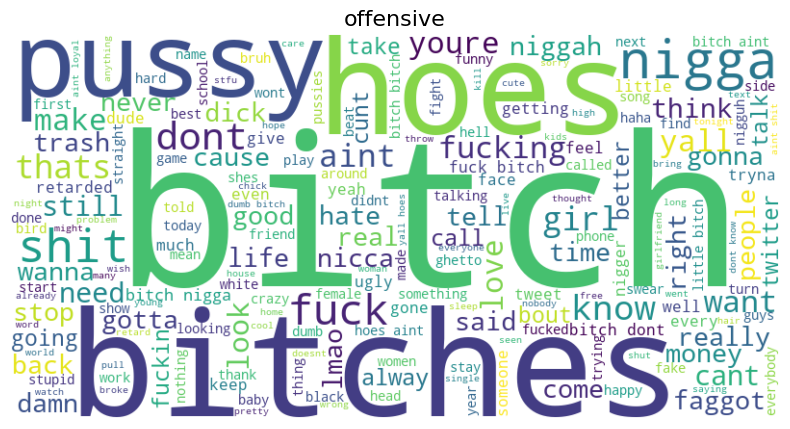

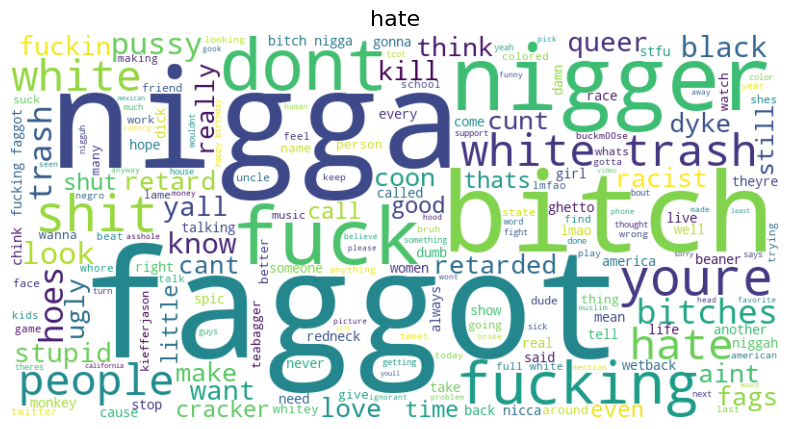

In [ ]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

for label in df['label'].unique():
    subset = df[df['label'] == label]
    plot_wordcloud(subset['clean_text'], title=label)

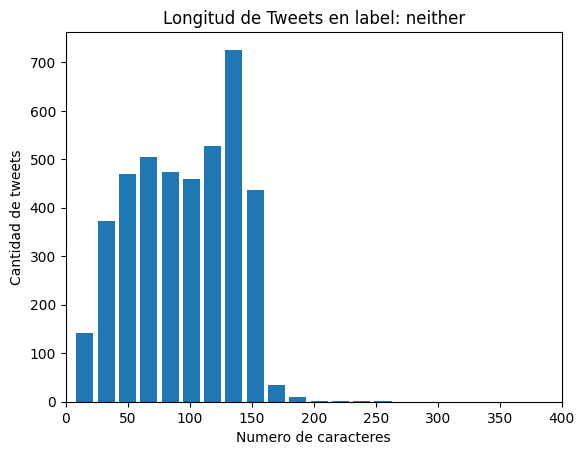

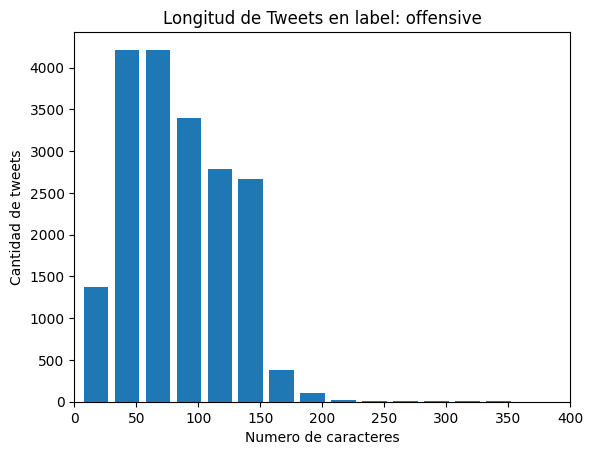

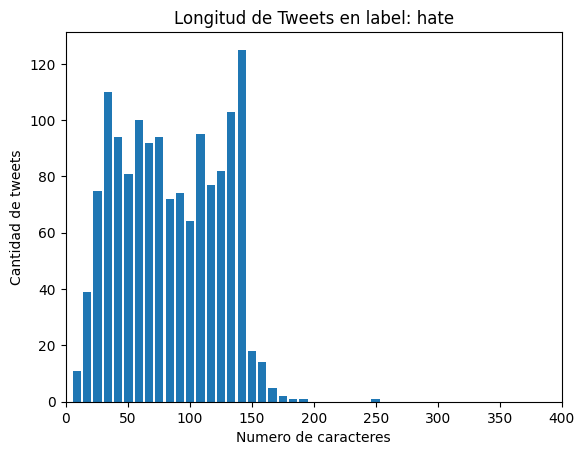

In [ ]:
df['text_length'] = df['tweet'].apply(len)

# Histograma por sentimiento
for label in df['label'].unique():
    subset = df[df['label'] == label]
    #print(subset['text_length'].describe())
    plt.hist(subset['text_length'], bins=30, alpha=1, label=str(label), rwidth=0.8)
    plt.xlim(0, 400)
    plt.title("Longitud de Tweets en label: " + str(label))
    plt.xlabel("Numero de caracteres")
    plt.ylabel("Cantidad de tweets")
    plt.show()

#sns.dogplot(data=df, x='label', y='text_length', palette='pastel', hue='label')

In [ ]:
def most_common_words(texts, n=10):
    all_words = " ".join(texts).split()
    common_words = Counter(all_words).most_common(n)
    return pd.DataFrame(common_words, columns=['Palabra', 'Frecuencia'])

# Top palabras por sentimiento
for sentiment in df['label'].unique():
    print(f"\nPalabras más comunes en tweets {sentiment.upper()}:")
    common_df = most_common_words(df[df['label'] == sentiment]['clean_text'])
    print(common_df)


Palabras más comunes en tweets NEITHER:
   Palabra  Frecuencia
0    trash         672
1     like         301
2     bird         287
3  yankees         281
4  charlie         256
5   yellow         213
6     dont         169
7    birds         167
8   monkey         111
9   ghetto         109

Palabras más comunes en tweets OFFENSIVE:
   Palabra  Frecuencia
0    bitch        7903
1  bitches        2989
2     like        2292
3     hoes        2266
4    pussy        2018
5     dont        1486
6     fuck        1285
7     shit        1184
8     aint        1089
9    nigga        1053

Palabras más comunes en tweets HATE:
   Palabra  Frecuencia
0    bitch         207
1   faggot         186
2     like         166
3    nigga         138
4    white         126
5     fuck         121
6    trash         112
7   nigger         110
8  fucking          94
9     dont          94


# Punto 2

In [ ]:
bow = CountVectorizer(max_features=5000)
X_bow = bow.fit_transform(df['clean_text']).toarray()

NameError: name 'CountVectorizer' is not defined